# Implement the non-parametric Locally Weighted Regression algorithm in order to fit data points. Select appropriate data set for your experiment and draw graphs

In [17]:
import numpy as np
import matplotlib.pyplot as plt

## Data Generation:
- Creates synthetic data following a sine wave
- Adds random noise to make it realistic
- X values range from 0 to 10

In [18]:
# Function to generate sample data with some noise
def generate_data(n_samples=50):
    np.random.seed(42)
    X = np.linspace(0, 10, n_samples)
    y = np.sin(X) + 0.3 * np.random.randn(n_samples)
    return X, y

## LOWESS Implementation:
- Uses Gaussian kernel for weight calculation
- Performs weighted least squares at each point
- Key parameter tau controls the bandwidth (smoothness)

In [7]:
# Locally Weighted Regression implementation
def lowess(x, y, xtest, tau=0.5):
    """
    Parameters:
    x: Training input
    y: Training output
    xtest: Points at which to evaluate the regression
    tau: Bandwidth parameter controlling smoothness
    """
    # Initialize predictions array
    ytest = np.zeros(len(xtest))
    
    # For each point we want to predict
    for i, x0 in enumerate(xtest):
        # Compute weights for all training points
        weights = np.exp(-(x - x0)**2 / (2 * tau**2))
        
        # Weighted least squares
        W = np.diag(weights.ravel())
        X = np.column_stack([np.ones_like(x), x])  # Add bias term
        
        # Compute weighted least squares solution
        theta = np.linalg.inv(X.T @ W @ X) @ X.T @ W @ y
        
        # Make prediction
        ytest[i] = np.array([1, x0]) @ theta
        
    return ytest


## Key Parameters:
- tau = 0.1: Very local, follows data closely
- tau = 0.5: Moderate smoothing
- tau = 2.0: More global, smoother fit

In [29]:
# Generate sample data
X, y = generate_data(50)

# Create test points for smooth curve
X_test = np.linspace(0, 10, 200)

# Fit with different bandwidth parameters
taus = [0.1, 0.5, 2.0]

## Visualization:
- Blue dots: Original data points
- Red line: LOWESS regression fit
- Green dashed line: True underlying function (sine wave)

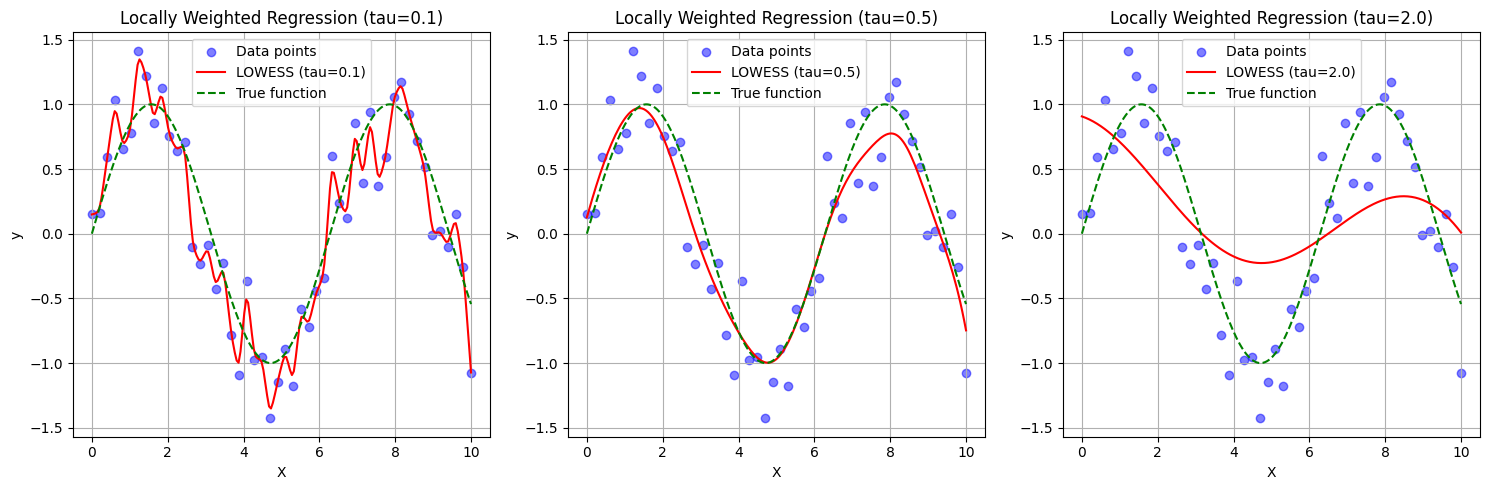

In [30]:
plt.figure(figsize=(15, 5))

for i, tau in enumerate(taus):
    # Apply LOWESS
    y_pred = lowess(X, y, X_test, tau)
    
    # Plot
    plt.subplot(1, 3, i+1)
    plt.scatter(X, y, color='blue', alpha=0.5, label='Data points')
    plt.plot(X_test, y_pred, 'r-', label=f'LOWESS (tau={tau})')
    plt.plot(X_test, np.sin(X_test), 'g--', label='True function')
    plt.title(f'Locally Weighted Regression (tau={tau})')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

## Key Observations:
Effect of tau:
- Small tau: More wiggly, follows noise
- Large tau: Smoother, might miss local patterns
- Medium tau: Balance between smoothing and local fit

Advantages:
- Handles nonlinear relationships well
- Adapts to local patterns in the data
- No assumption about global function form

Disadvantages:
- Computationally intensive
- Sensitive to bandwidth parameter (tau)
- Can overfit with small tau